# For modifying and testing new image creation

Hello!  This in Matt's quick tutorial on how to 
## Step 1: Load nessecary modules

In [1]:
# Add python modules
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Add parent directory for custom modules
from sys import path as sysPath
sysPath.append('../')
sysPath.append('../Machine_Score/')

# Load custom modules that simr has loaded
import main_SIMR as simr
gm = simr.gm
im = simr.im
ic = simr.ic
ms = simr.ms
sa = simr.sa
dc = simr.ms.dc

simr.test()
gm.test()
im.test()
ic.test()
ms.test()
dc.test()
sa.test()

SIMR: Hi!  You're in Matthew's main program for all things galaxy collisions
GM: Hi!  You're in Matthew's module for generally useful functions and classes
IM: Hi!  You're in Matthew Ogden's information module for SPAM
IC: Hi!  You're in Matthew's main code for all things image creation.
MS: Hi!  You're in Matthew's SIMR module for all things machine scoring images
DC: Hi!  You're in direct_image_compare.py
SA: Hi!  You're in Matthew's Main program for score analysis!


___
## Step 2: Load Target Info class
Needed for loading the target image and running through models later.

In [2]:
tDir = '../targetDir'
print('Before: \'%s\' \nAfter: \'%s\'' % (tDir,gm.validPath(tDir) ))
tDir = gm.validPath(tDir)

tInfo = im.target_info_class( targetDir = tDir, printAll=True)
if tInfo.status == False:
    print("WARNING")
else:
    print("Target Good!")

Before: '../targetDir' 
After: '/home/mbo2d/587722984435351614/'
IM: target_info_class.__init__:
	 - targetDir:  /home/mbo2d/587722984435351614/
IM: Target.initTargetDir():
	 - targetDir: /home/mbo2d/587722984435351614/
	 - targetDir: (True) /home/mbo2d/587722984435351614/
	 - infoDir: (True) /home/mbo2d/587722984435351614/information/
	 - baseInfoLoc: (True) /home/mbo2d/587722984435351614/information/base_target_info.json
	 - allInfoLoc: (True) /home/mbo2d/587722984435351614/information/target_info.json
	 - zooMergerDir: (True) /home/mbo2d/587722984435351614/zoo_merger_models/
	 - plotDir: (True) /home/mbo2d/587722984435351614/plots/
IM: Target: Opening target info json
Target Good!


---
## Step 3: Load a run info class.
Needed for loading a model image and testing later

In [3]:

print(tInfo.get('zoo_merger_models').get('00001'))

rId = 'r00000'
runArg = gm.inArgClass()
runArg.setArg("printAll",True)
runArg.setArg("tInfo",tInfo)

rInfo = tInfo.getRunInfo( rID=rId, rArg = runArg )
rInfo.tInfo = tInfo

if rInfo.status == False:
    print("WARNING")
else:
    print("Run '%s' Good!"%rInfo.get('run_id'))
    print(rInfo.get('tInfo').status)

None
IM: run_info_class.__init__
	 - runDir:  /home/mbo2d/587722984435351614/zoo_merger_models/run_00000/
IM: run.initRunDir
	 - runDir: /home/mbo2d/587722984435351614/zoo_merger_models/run_00000/
	 - runDir: (True) /home/mbo2d/587722984435351614/zoo_merger_models/run_00000/
	 - ptsDir: (True) /home/mbo2d/587722984435351614/zoo_merger_models/run_00000/particle_files/
	 - imgDir: (True) /home/mbo2d/587722984435351614/zoo_merger_models/run_00000/model_images/
	 - miscDir: (True) /home/mbo2d/587722984435351614/zoo_merger_models/run_00000/misc_images/
	 - infoLoc: (True) /home/mbo2d/587722984435351614/zoo_merger_models/run_00000/info.json
	 - baseLoc: (True) /home/mbo2d/587722984435351614/zoo_merger_models/run_00000/base_info.json
	 - Reading Info file.
IM: Run.__init__: Initalized: True
Run 'r00000' Good!
True


In [4]:
# If you need to change something in a param json
def changeParam():
    from copy import deepcopy
    pLoc = '../param/start_zoo_image.json'
    params = gm.readJson( pLoc )
    params['zoo_0'].pop('tgtArg')
    params['zoo_0']['targetName'] = 'zoo_0'
    params['zoo_0']['scoreType'] = 'target'
    gm.pprint(params)

    gm.saveJson( params, pLoc )


In [5]:
#im.getTargetInputData(tInfo,printAll=True)

In [6]:
# Load param of interest
from copy import deepcopy
pLoc = tInfo.imgParamLoc
params = gm.readJson( pLoc )
gm.pprint(params)


{'zoo_0': {'imgArg': {'comment': 'Basic '
                                 'image '
                                 'parameter '
                                 'file',
                      'galaxy_centers': {'px': '513',
                                         'py': '514',
                                         'sx': '309',
                                         'sy': '608'},
                      'image_size': {'height': 1024,
                                     'width': '1024'},
                      'name': 'zoo_0',
                      'target_id': '587722984435351614'},
           'name': 'zoo_0',
           'scoreType': 'target',
           'scrArg': {'cmpMethod': 'correlation'},
           'simArg': {'nPts': '100k',
                      'name': '100k'},
           'targetName': 'zoo_0'},
 'zoo_0_1': {'imgArg': {'blur': {'size': 7,
                                 'type': 'gaussian_blur',
                                 'weigth': 2.5},
                        'commen

In [19]:
# New param!
new_param = {}

# Copy original for example

new_param['zoo_2'] = deepcopy( params['zoo_0_1'] )

new_param['zoo_2']['name'] = 'zoo_2'
new_param['zoo_2']['targetName'] = 'zoo_2'
new_param['zoo_2']['imgArg']['name'] = 'zoo_2'
new_param['zoo_2']['imgArg']['comment'] = 'Cropping and rotating original zoo file'
new_param['zoo_2']['imgArg']['image_size']['height'] = 350
new_param['zoo_2']['imgArg']['image_size']['width'] = 600
new_param['zoo_2']['imgArg']['galaxy_centers']['px'] = int(600*1/3)
new_param['zoo_2']['imgArg']['galaxy_centers']['sx'] = int(600*2/3)
new_param['zoo_2']['imgArg']['galaxy_centers']['py'] = int(350/2)
new_param['zoo_2']['imgArg']['galaxy_centers']['sy'] = int(350/2)

gm.pprint(new_param)

{'zoo_2': {'imgArg': {'blur': {'size': 7,
                               'type': 'gaussian_blur',
                               'weigth': 2.5},
                      'comment': 'Cropping '
                                 'and '
                                 'rotating '
                                 'original '
                                 'zoo '
                                 'file',
                      'galaxy_centers': {'px': 200,
                                         'py': 175,
                                         'sx': 400,
                                         'sy': 175},
                      'image_size': {'height': 350,
                                     'width': 600},
                      'name': 'zoo_2',
                      'normalization': {'max_brightness': 50,
                                        'norm_constant': 2.5,
                                        'type': 'type1'},
                      'radial_const': [-0.5,
                    

In [20]:
#Define new arguments
newRunScoreArg = gm.inArgClass( )
newRunScoreArg.setArg( 'rInfo', rInfo )
newRunScoreArg.setArg( 'scoreParams', new_param )
newRunScoreArg.setArg( 'printAll', False )
newRunScoreArg.setArg( 'newImage', True )
newRunScoreArg.setArg( 'newScore', False )
newRunScoreArg.setArg( 'overWrite', True )

In [21]:

ic.adjustTargetImage( tInfo, new_param['zoo_2'] )
simr.simr_run( rInfo = rInfo, arg = newRunScoreArg )


/home/mbo2d/587722984435351614/information/target_zoo_2.png
SIMR.pipelineRun: Inputs
	 - rDir: None
	 - rInfo: <class 'Support_Code.info_module.run_info_class'>
SIMR.pipelineRun: 
	 - rInfo:  <Support_Code.info_module.run_info_class object at 0x7ff2d8f62b20>
IC: image_creator_run
IC: rInfo.status:  True


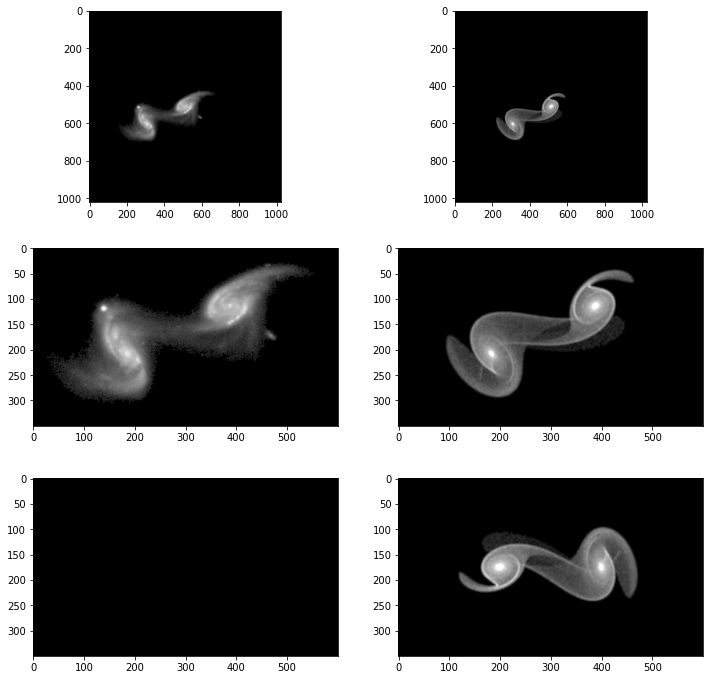

In [22]:
# View newly created image!
tImg1 = tInfo.getTargetImage( 'zoo_0' )
tImg2 = tInfo.getTargetImage( 'zoo_1' )
tImg3 = tInfo.getTargetImage( 'zoo_2' )
img1 = rInfo.getModelImg( 'zoo_0_1' )
img2 = rInfo.getModelImg( 'zoo_1' )
img3 = rInfo.getModelImg( 'zoo_2' )

plt.figure(figsize=(12,12))
plt.subplot(321)
plt.imshow(tImg1, cmap='gray')
plt.subplot(322)
plt.imshow(img1, cmap='gray')
plt.subplot(323)
plt.imshow(tImg2, cmap='gray')
plt.subplot(324)
plt.imshow(img2, cmap='gray')
plt.subplot(325)
plt.imshow(tImg3, cmap='gray')
plt.subplot(326)
plt.imshow(img3, cmap='gray')


In [12]:
# Save new param!

if False:
    tInfo.addImageParam( new_param )

Already found:  zoo_0_1


___
## Step 9: Execute new score operation for a complete target.
Execute the new function for a target and see if it works across many models

___
## Step 9: Execute new score operation for a complete target.
Execute the new function for a target and see if it works across many models

In [10]:
newTarget = gm.inArgClass()
newTarget.setArg( 'tInfo', tInfo )
newTarget.setArg( 'paramLoc', '../param/new_score.json' )
newTarget.setArg( 'printAll', False )
#newTarget.setArg( 'newScore', True )
#newTarget.setArg( 'overWrite', True )

simr.simr_target( arg=newTarget )

SIMR: pipelineTarget: input
	 - tDir: None
	 - tInfo: <class 'NoneType'>
SIMR: simr_target status:
	 - tInfo.status: True


***
## Step 10: View results!
View if your new method does well or not.

<AxesSubplot:title={'center':'new_score:\nCorr: -0.1663'}, xlabel='zoo_merger_score', ylabel='new_score'>

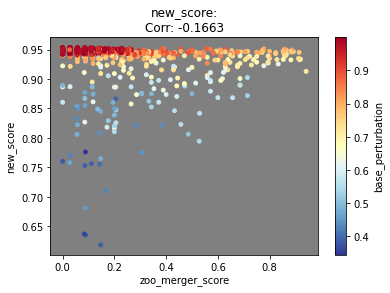

In [11]:
scores = tInfo.getScores()
sa.getNamedPlot(scores)

___
## Step 11: Add new function to direct_image_comparison.py

## Step 12: Rename parameter and save
- Create a new dict of the new score parameter
    - Parameter name
    - cmpMethod name: Match name of function in directory_image_compare
   

In [12]:
param = deepcopy( new_params['new_score'] )
param['name'] = 'base0_ssim'
param['cmpArg']['cmpMethod'] = 'ssim'

gm.pprint(param)

{'cmpArg': {'cmpMethod': 'ssim'},
 'imgArg': {'name': 'default',
            'pType': 'default'},
 'name': 'base0_ssim',
 'scoreType': 'target',
 'simArg': {'nPts': '100k',
            'name': '100k'},
 'targetName': 'zoo'}


___
## Step 13: Save in a score parameter file

In [13]:
# Load existing score parameter file
pLoc = gm.validPath('../param/base0.json')
print(pLoc,'\n')
baseParamClass = im.group_score_parameter_class(pLoc = pLoc)

#gm.pprint(baseParams)

# Add new score parameter to dict
baseParamClass.group[ param['name'] ] = param
gm.pprint(baseParamClass.group)
baseParamClass.saveParam( saveLoc = '../param/base0.json' )


/mnt/c/Users/ogden/OneDrive/Desktop/galStuff/galaxyJSPAM/param/base0.json 

{'base0_bcorr0': {'cmpArg': {'cmpMethod': 'binary_correlation'},
                  'imgArg': {'name': 'default',
                             'pType': 'default'},
                  'name': 'base0_bcorr0',
                  'scoreType': 'target',
                  'simArg': {'nPts': '100k',
                             'name': '100k'},
                  'targetName': 'zoo'},
 'base0_bcorr1': {'cmpArg': {'cmpMethod': 'binary_correlation',
                             'h1': 120,
                             'h2': 120},
                  'imgArg': {'name': 'default',
                             'pType': 'default'},
                  'name': 'base0_bcorr1',
                  'scoreType': 'target',
                  'simArg': {'nPts': '100k',
                             'name': '100k'},
                  'targetName': 'zoo'},
 'base0_bcorr2': {'cmpArg': {'cmpMethod': 'binary_correlation',
                          

___
## Step 14: Have target run the score parameter file you just updated

In [ ]:
newTarget = gm.inArgClass()
newTarget.setArg( 'tInfo', tInfo )
newTarget.setArg( 'scoreParams', baseParamClass.group )
newTarget.setArg( 'printAll', False )
newTarget.setArg( 'newScore', True )
#newTarget.setArg( 'overWrite', True )

#gm.pprint(newTarget.get('scoreParams'))

simr.simr_target( arg=newTarget )

SIMR: pipelineTarget: input
	 - tDir: None
	 - tInfo: <class 'NoneType'>
SIMR: simr_target status:
	 - tInfo.status: True
SIMR: new_target_scores:
	 - tInfo: True
	 - Runs needing scores: 1293
100.0% - 1293 / 1293	  



IM: Target.gatherRunInfos.
GM: Printing Input arguments
	- printBase - <class 'bool'> :  True
	- printAll - <class 'bool'> :  False
	- nProc - <class 'int'> :  -1
	- simple - <class 'bool'> :  False
	- runDir - <class 'NoneType'> :  None
	- sdssDir - <class 'NoneType'> :  None
	- targetDir - <class 'NoneType'> :  None
	- dataDir - <class 'NoneType'> :  None

0.2% - 3 / 1293	  
0.6% - 8 / 1293	  


___
## Step 15: view target results of new score function! Again!

In [ ]:
sco